In [1]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train[:5], y_train[:5], len(X_train), len(y_train)

(array([[ 1.53869929,  0.18874413],
        [ 0.39469854,  0.32372361],
        [-0.91914656,  1.31188165],
        [ 1.05396355, -0.70040787],
        [ 1.04067847, -0.4373387 ]]),
 array([1, 0, 0, 1, 1]),
 375,
 375)

In [2]:
voting_clf = VotingClassifier(
    estimators = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
voting_clf.estimators

[('rf', RandomForestClassifier(random_state=42)),
 ('lr', LogisticRegression(random_state=42)),
 ('svc', SVC(random_state=42))]

In [4]:
for name, clf in voting_clf.named_estimators_.items():
    score  = clf.score(X_test, y_test)
    print(f"name: {name} score: {score}")

name: rf score: 0.896
name: lr score: 0.864
name: svc score: 0.896


In [5]:
voting_clf.score(X_test, y_test)

0.912

In [6]:
voting_clf.voting = "soft"
# voting_clf.score(X_test, y_test)

In [7]:
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=10)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [10]:
def show_contour_plot(X, y, clf):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()

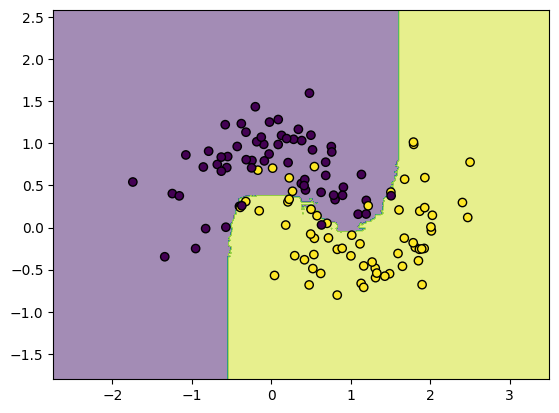

In [11]:
import numpy as np
from matplotlib import pyplot as plt
show_contour_plot(X_test, y_test, bag_clf)

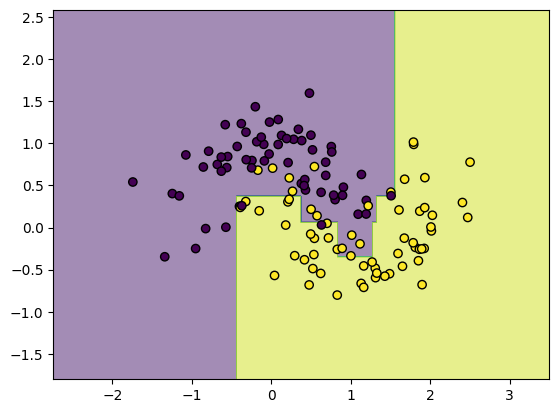

In [12]:
show_contour_plot(X_test, y_test, tree_clf)

In [13]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42, oob_score=True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)

In [14]:
bag_clf.oob_score_

0.9253333333333333

In [15]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.904

In [16]:
bag_clf.oob_decision_function_[:3]

array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ]])

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.912

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

erf_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

erf_clf.fit(X_train, y_train)
erf_clf.score(X_test, y_test)

0.912

In [19]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rf_clf = RandomForestClassifier(n_jobs=-1, max_leaf_nodes=20, random_state=42, n_estimators=500)
rf_clf.fit(iris.data, iris.target)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [20]:
list(zip(rf_clf.feature_importances_, iris.feature_names))

[(0.11369993712070751, 'sepal length (cm)'),
 (0.02427655674840012, 'sepal width (cm)'),
 (0.442472844942238, 'petal length (cm)'),
 (0.4195506611886544, 'petal width (cm)')]

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [22]:
ada_clf.score(X_test, y_test)

0.904

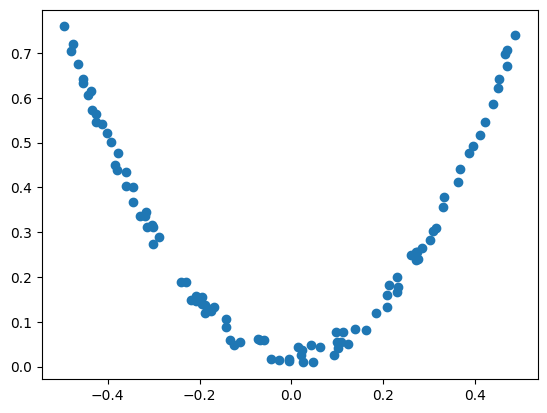

In [23]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.rand(100)

plt.scatter(X, y)
plt.show()

In [24]:
dtr_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

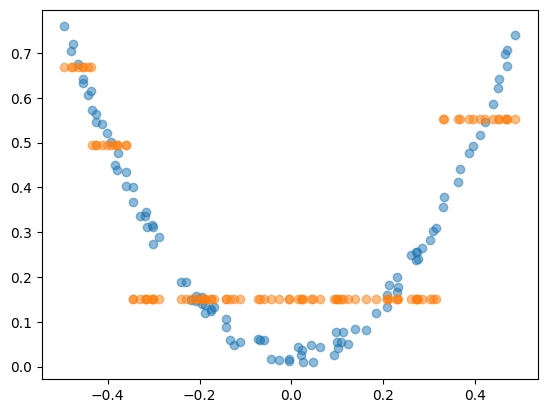

In [25]:
y_pred1 = dtr_reg.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.scatter(X, y_pred1, alpha=0.5)
plt.show()

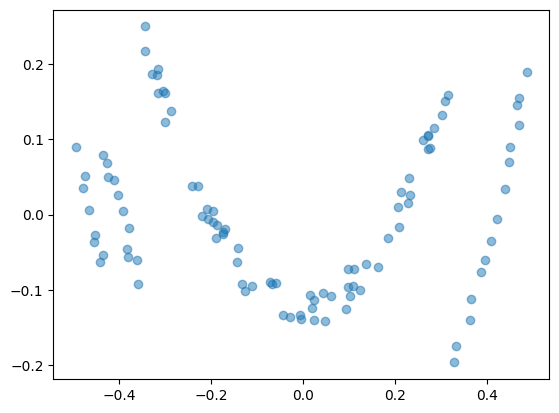

In [26]:
dtr_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
y2 = y - y_pred1
dtr_reg_2.fit(X, y2)

plt.scatter(X, y2, alpha=0.5)

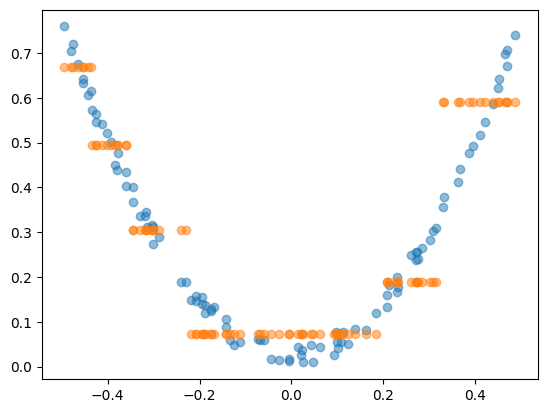

In [28]:
y_pred2 = dtr_reg_2.predict(X) 

plt.scatter(X, y, alpha=0.5)
plt.scatter(X, y_pred2 + y_pred1, alpha=0.5)
plt.show()

In [31]:
dtr_reg_3 = DecisionTreeRegressor(max_depth=2, random_state=42)
y3 = y - y_pred1 - y_pred2
dtr_reg_3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

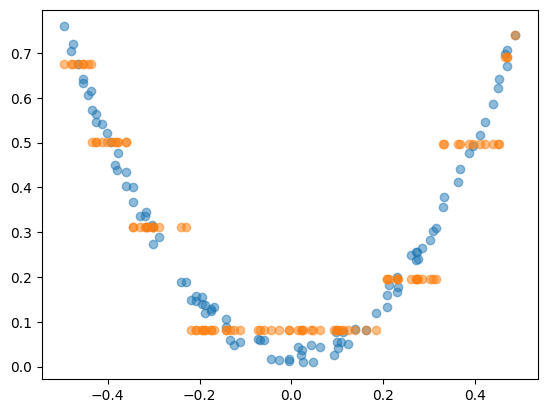

In [32]:
y_pred3 = dtr_reg_3.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.scatter(X, y_pred3 + y_pred2 + y_pred1, alpha=0.5)
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)

gb_reg.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [41]:
gb_reg_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500, n_iter_no_change=10, random_state=42)
gb_reg_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [42]:
gb_reg_best.n_estimators_

86

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


hgb_reg = make_pipeline(
    make_column_transformer(
        (OrdinalEncoder(), ["ocean_proximity"]),
        remainder="passthrough"
    ),
    HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
)

housing = pd.read_csv("datasets/housing/housing.csv")
housing_labels = housing["median_house_value"]
housing = housing.drop("median_house_value", axis=1)

hgb_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0],
                                               random_state=42))])

In [52]:
from sklearn.metrics import root_mean_squared_error

rsme = root_mean_squared_error(housing_labels, hgb_reg.predict(housing))
rsme

41826.56852954782

In [53]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
)

In [55]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [56]:
stacking_clf.score(X_train, y_train)

0.944